# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [7]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50).round(2)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50).round(2)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64 74.   79.79 92.41 88.68]
Notas da Estratégia B: [64.25 79.64 68.87 60.83 74.66]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




Nesse teste, a hipótese alternativa quer determinar se a médias das notas na Estratégia B é **maior** do que a média das notas na Estratégia A, logo este é um teste unilateral a direita.  

Se estivessemos tentando determinar que a média da Estratégia B é **menor** do que média da Estratégia A, seria unilateral a esquerda ou se quisessemos determinar apenas se há **diferença** significativa entre as médias das notas das Estratégias A e B, estaríamos falando de teste bicaudal. 

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [8]:
media_estrategia_A = amostra_estrategia_A.mean().round(2)
print('Média Amostra da Estratégia A:', media_estrategia_A)

variancia_estrategia_A = amostra_estrategia_A.var().round(2)
print('Variância Amostra da Estratégia A:', variancia_estrategia_A)

Média Amostra da Estratégia A: 71.41
Variância Amostra da Estratégia A: 126.68


In [9]:
media_estrategia_B = amostra_estrategia_B.mean().round(2)
print('Média Amostra da Estratégia B:', media_estrategia_B)

variancia_estrategia_B = amostra_estrategia_B.var().round(2)
print('Variância Amostra da Estratégia B:', variancia_estrategia_B)

Média Amostra da Estratégia B: 74.75
Variância Amostra da Estratégia B: 108.27


Ao calcular a média das duas amostragens, conferimos que a Estratégia B apresenta uma média superior à Estratégia A. Contudo, a análise da variabilidade dos dados indica que essa diferença é pequena quando comparada ao desvio padrão das amostras, sendo necessário a realização de testes estatísticos para avaliar se essa diferênça é significante. 

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [15]:
# Tamanho das amostras
n = len(amostra_estrategia_A)

# Calcular a estatística de teste Z com a formula:
z_statistic = (media_estrategia_B - media_estrategia_A) / ((variancia_estrategia_A/n + variancia_estrategia_B/n)**0.5)

# Calcular o p-valor (teste bilateral)
p_valor = 1 - stats.norm.cdf(z_statistic)

# Imprimir os resultados
print("Estatística de teste Z:", z_statistic)
print("p-valor:", p_valor)

# Comparar o p-valor com o nível de significância
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rejeitamos a hipótese nula: há uma diferença significativa entre as taxas de sucesso dos dois métodos de ensino.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para concluir que há uma diferença significativa entre os dois métodos de ensino.")

Estatística de teste Z: 1.5407910400684266
p-valor: 0.06168382540620776
Não rejeitamos a hipótese nula: não há evidências suficientes para concluir que há uma diferença significativa entre os dois métodos de ensino.


Ao aplicar o teste estátistico Z obteve-se p-value de 0.06, valor superior ao nível de significância estabelecido (0.05). Sendo assim, não rejeitamos a hipótese nula de que as médias dos notas da Estratégia A e B são iguais.  
Tal resultado reforça a observação descritiva inicial feita da relação entre as médias e a variância. 

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

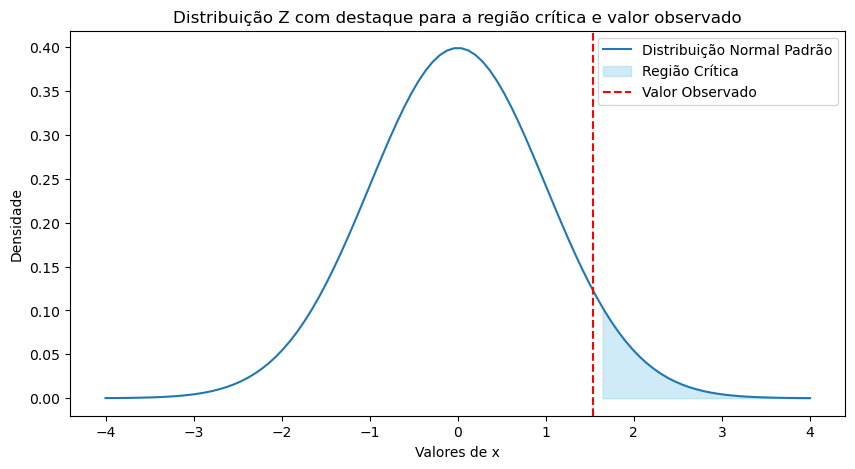

In [24]:
# Configurações padrão do gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Curva normal padrão
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x)

# Região crítica (teste unilateral à direita)
alpha = 0.05
limite_critico = stats.norm.ppf(1 - alpha)

plt.plot(x, y, label='Distribuição Normal Padrão')

# Área crítica
x_crit = np.linspace(limite_critico, 4, 100)
plt.fill_between(x_crit, stats.norm.pdf(x_crit), color='skyblue', alpha=0.4, label='Região Crítica')

# Z observado
plt.axvline(z_statistic, color='red', linestyle='--', label='Valor Observado')

plt.legend()
plt.title('Distribuição Z com destaque para a região crítica e valor observado')
plt.xlabel('Valores de x')
plt.ylabel('Densidade')
plt.show()

O gráfico exibe de forma visual o que havia observado com o teste estatístico Z e o p-value. A imagem confirma que p-value encontra-se fora da área de significância. 